In [1]:
#import all libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as ply
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [2]:
# load the dada from new_york_listings_2024.csv
df =pd.read_csv('new_york_listings_2024.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


In [9]:
df.select_dtypes(['object']).nunique()

name                   9836
host_name              5815
neighbourhood_group       5
neighbourhood           221
room_type                 4
last_review            1878
license                 879
rating                  162
bedrooms                 12
baths                    17
dtype: int64

In [10]:
columns = ['neighbourhood_group','room_type','bedrooms','baths']
df[columns] = df[columns].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              20758 non-null  int64   
 1   name                            20758 non-null  object  
 2   host_id                         20758 non-null  int64   
 3   host_name                       20758 non-null  object  
 4   neighbourhood_group             20758 non-null  category
 5   neighbourhood                   20758 non-null  object  
 6   latitude                        20758 non-null  float64 
 7   longitude                       20758 non-null  float64 
 8   room_type                       20758 non-null  category
 9   price                           20758 non-null  float64 
 10  minimum_nights                  20758 non-null  int64   
 11  number_of_reviews               20758 non-null  int64   
 12  last_review       

In [19]:
#ohe
ohe = OneHotEncoder(drop= 'first', sparse =False)
encoded_array = ohe.fit_transform(df[columns])

In [20]:
encoded_array

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [25]:
encoded_df = pd.DataFrame(encoded_array , columns = ohe.get_feature_names_out(columns))

In [28]:
encoded_df.head()

,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Hotel room,room_type_Private room,room_type_Shared room,bedrooms_14,bedrooms_15,bedrooms_2,...,baths_3,baths_3.5,baths_4,baths_4.5,baths_5,baths_5.5,baths_6,baths_6.5,baths_7,baths_Not specified
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              20758 non-null  int64   
 1   name                            20758 non-null  object  
 2   host_id                         20758 non-null  int64   
 3   host_name                       20758 non-null  object  
 4   neighbourhood_group             20758 non-null  category
 5   neighbourhood                   20758 non-null  object  
 6   latitude                        20758 non-null  float64 
 7   longitude                       20758 non-null  float64 
 8   room_type                       20758 non-null  category
 9   price                           20758 non-null  float64 
 10  minimum_nights                  20758 non-null  int64   
 11  number_of_reviews               20758 non-null  int64   
 12  last_review       

In [33]:
col_to_drop= ['id','name', 'host_name','neighbourhood','last_review','license']
df = pd.concat([df.drop(col_to_drop, axis =1),encoded_df],axis =1) #drop all string type


KeyError: "['id' 'name' 'host_name' 'neighbourhood' 'last_review' 'license'] not found in axis"

In [31]:
df.head(1)

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,...,baths_3,baths_3.5,baths_4,baths_4.5,baths_5,baths_5.5,baths_6,baths_6.5,baths_7,baths_Not specified
0,7130382,Brooklyn,40.68371,-73.96461,Private room,55.0,30,3,0.03,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   host_id                            20758 non-null  int64   
 1   neighbourhood_group                20758 non-null  category
 2   latitude                           20758 non-null  float64 
 3   longitude                          20758 non-null  float64 
 4   room_type                          20758 non-null  category
 5   price                              20758 non-null  float64 
 6   minimum_nights                     20758 non-null  int64   
 7   number_of_reviews                  20758 non-null  int64   
 8   reviews_per_month                  20758 non-null  float64 
 9   calculated_host_listings_count     20758 non-null  int64   
 10  availability_365                   20758 non-null  int64   
 11  number_of_reviews_ltm              20758 

In [35]:
df = df.drop(columns, axis =1) #due to ohe


In [37]:
#rating
df['rating'].astype('float')

ValueError: could not convert string to float: 'No rating'

In [42]:
df[df['rating'] =='No rating']

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,...,baths_3,baths_3.5,baths_4,baths_4.5,baths_5,baths_5.5,baths_6,baths_6.5,baths_7,baths_Not specified
10,84109314,40.760680,-73.909260,120.0,30,1,0.22,1,365,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,21662972,40.709994,-74.005000,100.0,30,1,0.23,1,38,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,38713773,40.743470,-73.913960,70.0,30,1,0.02,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,220229838,40.761760,-73.976590,1000.0,30,1,0.02,10,363,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,171107511,40.765290,-73.863610,45.0,30,1,0.02,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20744,70636634,40.771437,-73.955661,200.0,30,1,0.77,13,156,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20746,326434148,40.746682,-73.990396,65.0,30,1,0.65,6,269,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20747,334376746,40.802970,-73.958090,53.0,30,1,0.86,9,361,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20751,22541573,40.731810,-74.008190,215.0,30,1,0.01,164,358,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df['rating'].replace(['No rating'],np.nan).astype(float)

ValueError: could not convert string to float: 'New '

In [44]:
df['rating'].replace(['No rating','New '],np.nan).astype(float)

0        5.00
1        4.67
2        4.17
3        4.64
4        4.91
         ... 
20753    4.75
20754    4.46
20755    4.93
20756    5.00
20757    4.89
Name: rating, Length: 20758, dtype: float64

In [46]:
df['rating'] = pd.to_numeric(df['rating'],errors= 'coerce' )

<AxesSubplot:xlabel='rating', ylabel='Count'>

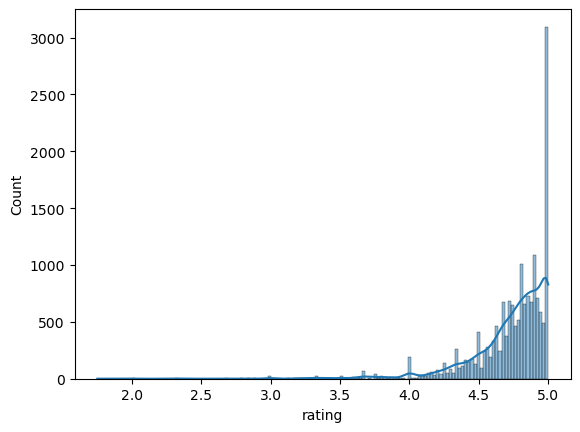

In [47]:
sns.histplot(df['rating'],kde = True)

In [48]:
df_median = df.copy()

In [49]:
df_median['rating'] = df_median['rating'].fillna(df_median['rating'].median()) 

In [52]:
#median
X= df_median.drop(['price'], axis =1)
y=df_median['price']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42 )

#Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

#regression
model =LinearRegression()
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)


#RSME
rsme_median = np.sqrt(mean_squared_error(y_test,y_pred))

In [53]:
#drop col
df_drop_col = df.copy()
df_drop_col = df_drop_col.drop (['rating'], axis = 1)



X= df_drop_col.drop(['price'], axis =1)
y=df_drop_col['price']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42 )

#Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

#regression
model =LinearRegression()
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)


#RSME
rsme_drop_col = np.sqrt(mean_squared_error(y_test,y_pred))

In [54]:
#drop col
df_del_rows = df.copy()
df_del_rows = df_del_rows[~df_del_rows['rating'].isnull()]

In [55]:
X= df_del_rows.drop(['price'], axis =1)
y=df_del_rows['price']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42 )

#Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

#regression
model =LinearRegression()
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)


#RSME
rsme_del_rows = np.sqrt(mean_squared_error(y_test,y_pred))

In [56]:
print(f"rsme_median {rsme_median}")
print(f"rsme_drop_col {rsme_drop_col}")
print(f"rsme_del_rows {rsme_del_rows}")

rsme_median 281.6942502357817
rsme_drop_col 281.46909393370385
rsme_del_rows 200.65432886394794


In [61]:
len(df_del_rows)/len(df)

0.8192504094806822

In [62]:
df['price'].mean()

187.77661624433952